# Boston Housing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# adjusts style to emulate ggplot 
# a popular plotting package for R
plt.style.use('ggplot')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# EDA 

In [2]:
# load the Boston Housing Data dataset 
boston = pd.read_csv('boston.csv')
print(boston.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


There are 14 attributes in each case of the dataset. They are:
+ CRIM - per capita crime rate by town
+ ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
+ INDUS - proportion of non-retail business acres per town.
+ CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
+ NOX - nitric oxides concentration (parts per 10 million)
+ RM - average number of rooms per dwelling
+ AGE - proportion of owner-occupied units built prior to 1940
+ DIS - weighted distances to five Boston employment centres
+ RAD - index of accessibility to radial highways
+ TAX - full-value property-tax rate per 10,000 dollars 
+ PTRATIO - pupil-teacher ratio by town 
+ B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
+ LSTAT - percent lower status of the population 
+ MEDV - Median value of owner-occupied homes in 1000 dollars 

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NX         506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We can see that the dataset has all numeric datatypes. 12 columns are floats and 2 columns are integers. There are 506 rows in the dataset. There are 13 features and 1 target, MEDV (the median housing value) in thousands of dollars.

In [4]:
# look at the basic statistics of the data
boston.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Create Feature and Target Arrays

In [5]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

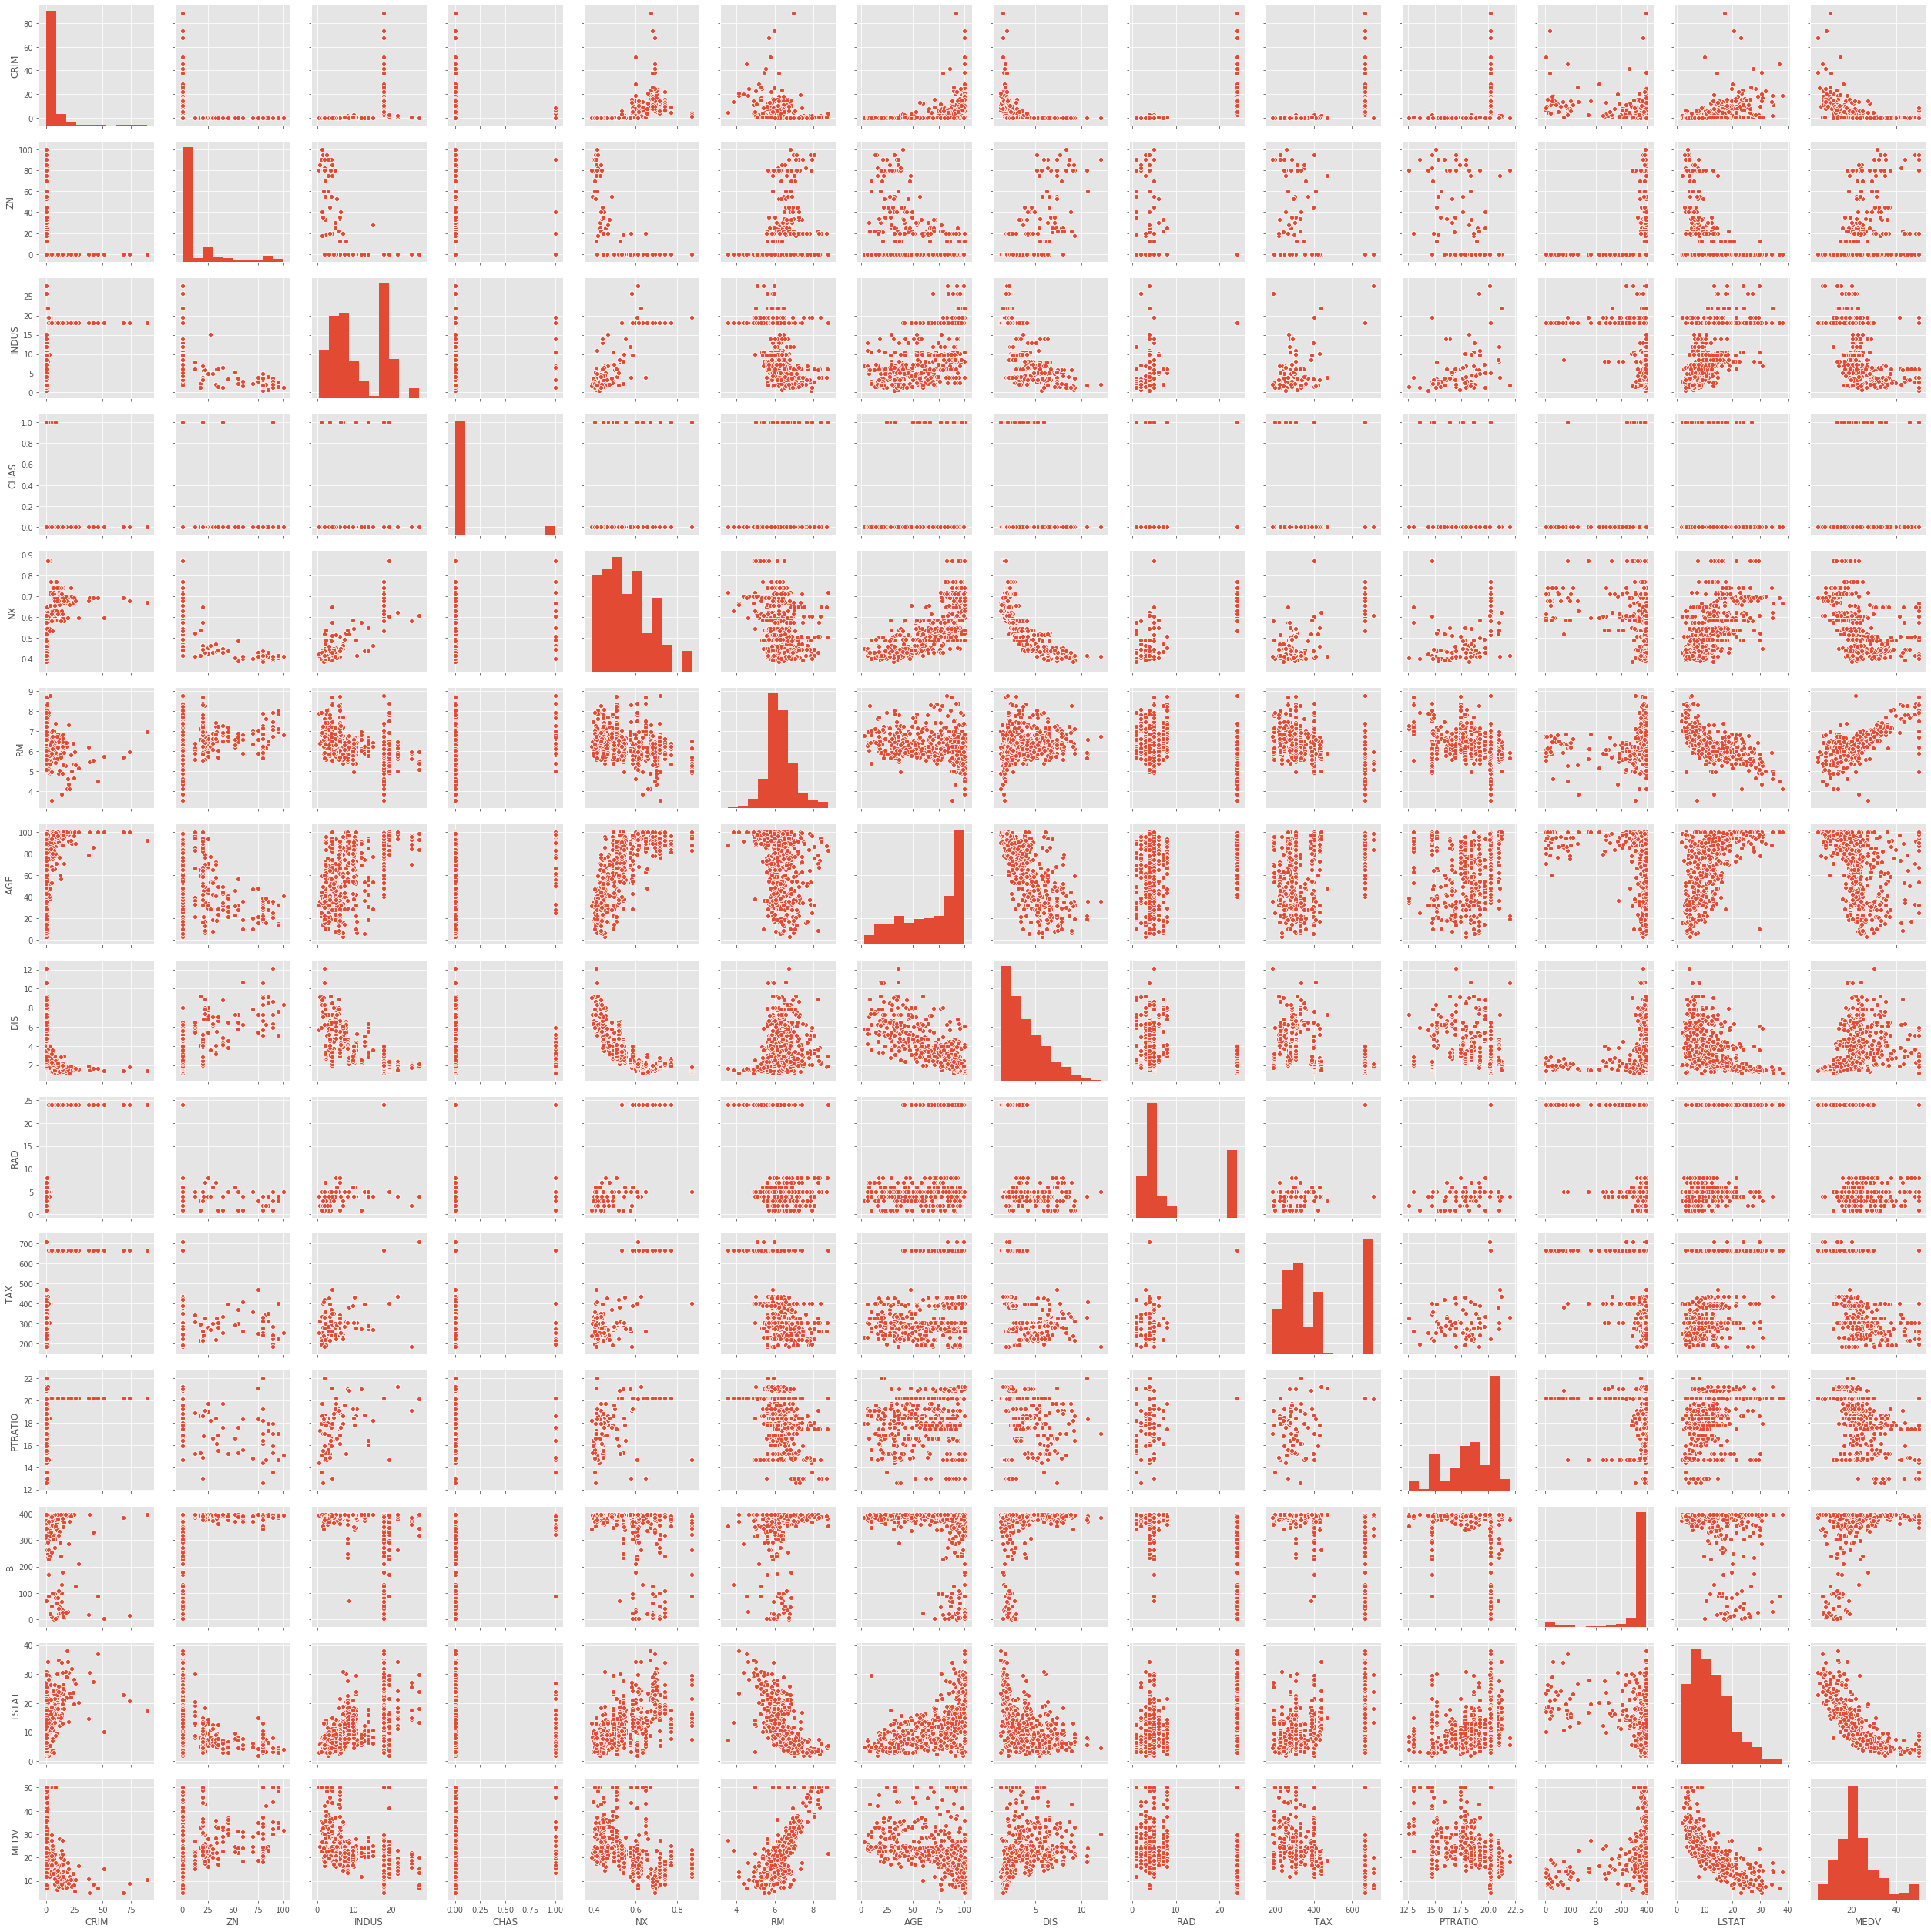

In [6]:
# create pairplots of all numeric factors in the dataset 
sns.pairplot(boston)

## Predicting House Price from a Single Feature

We want to fit a line to the data. A line in two dimensions is always in the form y = ax + b where y is the target, x is the single feature, and a,b are the parameters of the model that we want to learn. The question is how we choose a and b. A common method is to choose an error function for any given line and choose the line that minimizes the error function. We want the line to be as close to the data points as possible. We want to minimize the vertical distance between the points (the residual) and the line. We minimize the sum of squares of the residuals so that a large negative residual doesn't cancel out a large positive residual. This loss function is called **Ordinary Least Squares (OLS)**. This is the same as minimizing the **Mean Squared Error** of the predictions on the training set. We can also do linear regression in higher dimensions.

In [7]:
# slice out column with number of rooms
X_rooms = X[:,5]

In [8]:
# make sure that these are numpy arrays
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [9]:
# create arrays with only a single column 
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

### Plot House Value vs. Number of Rooms

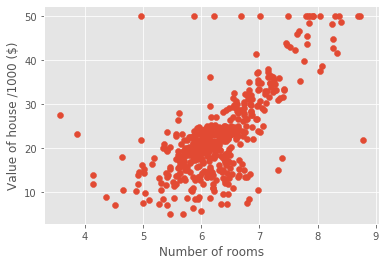

In [10]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

As we would expect, more rooms are associated with higher prices.

### Fitting a Linear Regression Model 

In [11]:
# instantiate a linear regression model
reg = LinearRegression()

In [12]:
# fit the linear regression model to number of rooms 
# and MEDV target 
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# look at the R-squared value
reg.score(X_rooms, y)

0.4835254559913343

R-squared values are in a range between 0 and 1. Using a single predictor of number of rooms gives a pretty low R-Squared value of 0.48. We will see what we can do to improve. 

In [14]:
# create array with prediction space for scatterplot
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

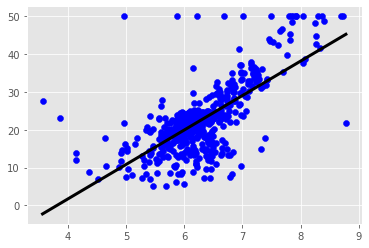

In [15]:
# create a scatterplot of predictions with linear regression line
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

## Linear Regression on All Features

In [16]:
# sklearn train_test_split randomly splits dataset
# into training set and testing set 
# in this case, we are using 30% of the dataset for a test set 
# random_state=42 sets seed 
# this means we can reproduce the exact split and downstream results later
# stratify=y means that labels will be distributed in the train/test datasets
# as they are in the full dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# instantiate a linear regression model
reg_all = LinearRegression()

In [18]:
# fit on the training set
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# predict on the test set
y_pred = reg_all.predict(X_test)

In [20]:
# look at the R-squared value
reg_all.score(X_test, y_test)

0.7112260057484927

R-squared values are in a range between 0 and 1. A R-squared value of 0.71 is pretty high, indicating that the multi-linear regression model with all variables is a pretty good fit for the data. We would almost never use linear regression straight out of the box like this without regularization which places further constraints on the model coefficients. 

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 4.638689926172825


The root mean squared error is a measure of how well the model performed. It does this by measuring the difference between predicted values and the actual values. The error term is important because we want to minimize the error. In other words, our predictions are close to the actual value. ***RMSE*** penalizes large errors more.  

## Cross-validation
If we compute R-squared on our test set, the result is dependent on how the model was split. The dataset could have been split into a training and test set in such a way that the training and test sets have some quirks. The R-squared value computed on a particular training and test set might not be representative of the model's ability to generalize. With 5-fold Cross-validation, we split the dataset into five folds. We have five splits where we hold back a fold as a test set and train on the other four folds so that by the end of the process, each fold has been the test set in a split. We can compute the mean and median as well as confidence intervals for the R-squared results from these splits. Using more folds is more computationally expensive. 

In [22]:
# instantiate a linear regressor
reg_cv = LinearRegression()

In [23]:
cv_results = cross_val_score(reg_cv, X, y, cv=5)
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [24]:
np.mean(cv_results)

0.3532759243958807

Note that it is possible to get a negative R-square for equations that do not contain a constant term. Because R-square is defined as the proportion of variance explained by the fit, if the fit is actually worse than just fitting a horizontal line then R-square is negative. If we just used train/test split and the R-squared value was 0.71, it would seem like the linear regression model is a pretty good fit for the data. However, using 5-fold Cross Validation with an average R-squared value of 0.35, a linear regression model doesn't seem like as good of a fit. 